In [11]:
# Crime Statistics Data Preprocessing

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Here we load the crime statistics dataset and assign appropriate column names.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
column_names_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names'

# Load the dataset
data = pd.read_csv(url, header=None, na_values='?')

# Load the column names
column_names = [
    'state', 'county', 'community', 'communityname', 'fold',
    'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
    'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
    'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
    'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
    'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
    'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
    'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
    'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
    'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
    'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant',
    'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
    'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart',
    'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState',
    'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop',
    'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
    'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack',
    'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
    'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
    'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop',
    'ViolentCrimesPerPop'
]

# Assign column names to the dataframe
data.columns = column_names

# Step 2: Initial Data Exploration (Done previously)
# Viewing basic information, first few rows, and summary statistics

# Basic Information
print("Basic Information:")
print(data.info())

print("\nFirst few rows of the dataset:")
print(data.head())

print("\nSummary Statistics for Numerical Features:")
print(data.describe())

print("\nSummary Statistics for Categorical Features:")
print(data.describe(include=[object]))


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 1.9+ MB
None

First few rows of the dataset:
   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          

In [12]:
# Step 3: Handling Missing Values
# Separate numerical and categorical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=[object]).columns.tolist()

# Impute missing values for numerical features
imputer_num = SimpleImputer(strategy='mean')
data[numerical_features] = imputer_num.fit_transform(data[numerical_features])

# Explanation:
# Missing values can cause errors in data analysis and machine learning models.
# Imputing with the mean is a common strategy for numerical features to maintain data consistency.

In [13]:
# Step 4: Encoding Categorical Variables
# Drop non-essential categorical columns (communityname, state, county, community, fold)
data = data.drop(columns=['communityname', 'state', 'county', 'community', 'fold'])

# Explanation:
# Categorical variables like 'communityname' are often non-essential for analysis and can introduce noise.
# Dropping them helps in simplifying the dataset.

# Update numerical_features list after dropping columns
numerical_features = [col for col in numerical_features if col in data.columns]

In [14]:
# Step 5: Outlier Removal
# Outlier removal using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Explanation:
# Outliers can skew the results of data analysis and modeling.
# The IQR method is used to identify and remove outliers, ensuring a more robust analysis.

In [15]:
# Step 6: Normalizing Numerical Features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Explanation:
# Normalizing numerical features ensures that all features contribute equally to the analysis and models,
# preventing features with larger scales from dominating.

In [16]:
# Step 7: Splitting the Dataset into Train and Test Sets
X = data.drop(columns=['ViolentCrimesPerPop'])
y = data['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation:
# Splitting the data into training and testing sets allows for the evaluation of model performance on unseen data,
# helping to prevent overfitting.

In [17]:
# Display basic information about the processed data
print("Basic Information after Preprocessing:")
print(data.info())

print("\nFirst few rows of the processed dataset:")
print(data.head())

print("\nSummary Statistics of the processed dataset:")
print(data.describe())

Basic Information after Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 2 to 1989
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 439.8 KB
None

First few rows of the processed dataset:
    population  householdsize  racepctblack  racePctWhite  racePctAsian  \
2    -0.969413      -0.073191      3.671661     -3.497654      1.441620   
8     0.543005      -0.828384      1.065110     -0.603358     -0.803391   
13   -0.465274       0.115608     -0.732511      0.843790     -0.504056   
19   -0.969413      -0.167590     -0.283106      0.637055     -0.953058   
27   -0.465274      -0.545187     -0.642630      0.947158     -0.803391   

    racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
2     -0.134399     0.130566     0.290507    -0.014925   -0.699234  ...   
8     -0.721101     0.001983    -0.005875    -0.014925    0.306755  ...   
13    -0.574425    -0.383769     1.179656     0.630414   -1.265103  ..

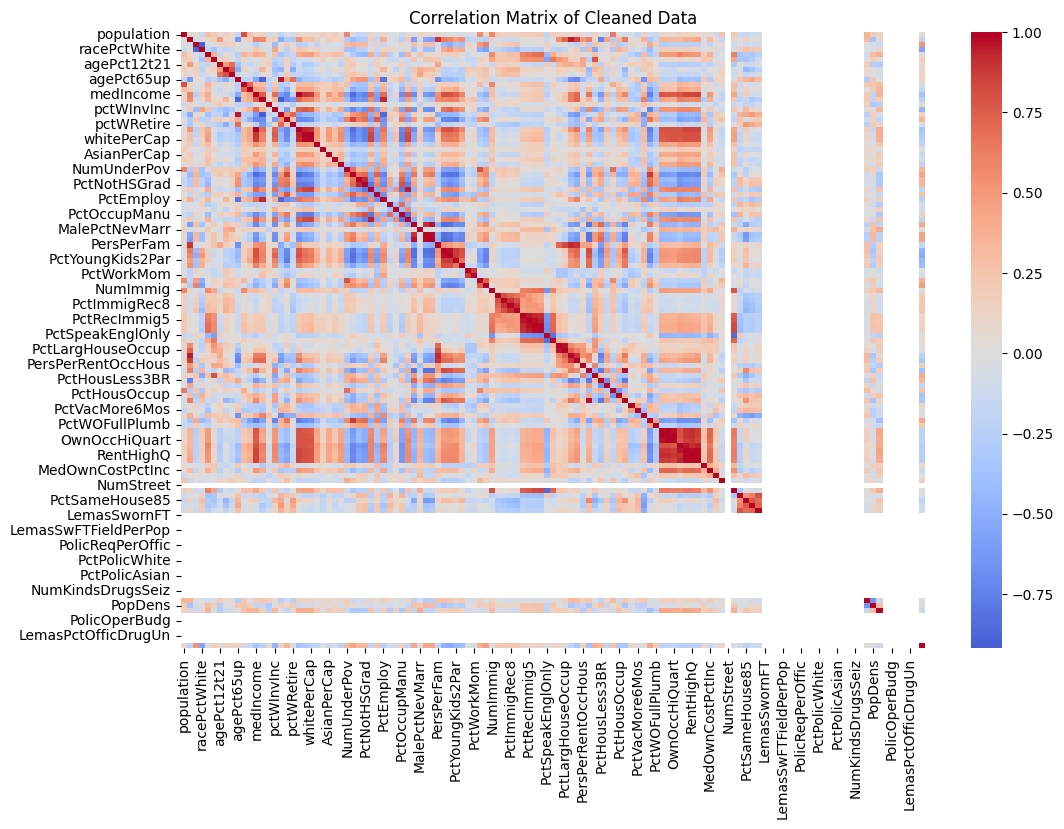

Data preprocessing and cleaning complete.


In [18]:
# Save the cleaned dataset for further analysis
data.to_csv('cleaned_communities_crime_data.csv', index=False)

# Visualize the cleaned data
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Cleaned Data')
plt.show()

print("Data preprocessing and cleaning complete.")